In [ ]:
import pandas as pd

# Replace 'file_path.csv' with the actual path to your CSV file
file_path = '/content/youtube_data.csv'

# Read the CSV file into a DataFrame
all_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it has been read correctly
print(all_data.head())


  country     video_id                                              title  \
0      AL  VBZPtG2svI0                           YLL LIMANI - MERRI KREJT   
1      AL  MVkKIzydJEY                        2TON - KANIHER (prod. Dard)   
2      AL  oyDUzcu9Tqo                        Glow Stick Secret 😱 #shorts   
3      AL  IkKlaRUpJhs       Alban Skenderaj - La La La  (Official Video)   
4      AL  BtSvjHkt-bU  Mariola & Jurgen Kacani - Te dua per koken ten...   

                                         description  \
0  #ylllimani #three60music #360media\n\nProduced...   
1  STREAM: https://colonize.us/c/2ton-kaniher\n\n...   
2  Mystery inside Glow Stick Bracelet! Thank you ...   
3  Produced by: Avaxus (Lorenc Aliaj)\nMusic and ...   
4  Listen now Mariola & Jurgen Kacani - Te dua pe...   

                                    thumbnail_url    likes     views  \
0  https://i.ytimg.com/vi/VBZPtG2svI0/default.jpg    10470    826149   
1  https://i.ytimg.com/vi/MVkKIzydJEY/default.jpg     86

In [ ]:
row_count = all_data.shape[0]
print("Count of rows in all_data DataFrame:", row_count)

Count of rows in all_data DataFrame: 5650


In [ ]:
unique_video_ids_count = all_data['video_id'].nunique()
print("Count of unique video IDs:", unique_video_ids_count)

Count of unique video IDs: 2096


In [ ]:
####Column Addition
# Convert 'duration' to total minutes
def duration_to_minutes(duration):
    parts = duration.split('PT')[1]
    hours = 0
    minutes = 0
    seconds = 0
    if 'H' in parts:
        hours = int(parts.split('H')[0])
        parts = parts.split('H')[1]
    if 'M' in parts:
        minutes = int(parts.split('M')[0])
        parts = parts.split('M')[1]
    if 'S' in parts:
        seconds = int(parts.split('S')[0])
    total_minutes = hours * 60 + minutes + seconds / 60
    return total_minutes

all_data['duration_minutes'] = all_data['duration'].apply(duration_to_minutes)

In [ ]:
###Image Processing
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# Read the CSV file into a DataFrame
all_data = pd.read_csv('/content/youtube_data.csv')

# Function to extract dominant color from image
def extract_background_color(image_url):
    # Download the image
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))

    # Resize image for faster processing
    image.thumbnail((100, 100))

    # Convert image to numpy array
    image_array = np.array(image)

    # Flatten the image array to get a list of RGB values
    pixels = image_array.reshape((-1, 3))

    # Compute the mean RGB value as the background color
    background_color = np.mean(pixels, axis=0)

    return background_color.astype(int)

# Apply the function to each cell of the 'thumbnail_url' column
all_data['background_color'] = all_data['thumbnail_url'].apply(lambda x: extract_background_color(x) if pd.notnull(x) else None)

# Display the DataFrame with background colors
print(all_data.head())


  country     video_id                                              title  \
0      AL  VBZPtG2svI0                           YLL LIMANI - MERRI KREJT   
1      AL  MVkKIzydJEY                        2TON - KANIHER (prod. Dard)   
2      AL  oyDUzcu9Tqo                        Glow Stick Secret 😱 #shorts   
3      AL  IkKlaRUpJhs       Alban Skenderaj - La La La  (Official Video)   
4      AL  BtSvjHkt-bU  Mariola & Jurgen Kacani - Te dua per koken ten...   

                                         description  \
0  #ylllimani #three60music #360media\n\nProduced...   
1  STREAM: https://colonize.us/c/2ton-kaniher\n\n...   
2  Mystery inside Glow Stick Bracelet! Thank you ...   
3  Produced by: Avaxus (Lorenc Aliaj)\nMusic and ...   
4  Listen now Mariola & Jurgen Kacani - Te dua pe...   

                                    thumbnail_url    likes     views  \
0  https://i.ytimg.com/vi/VBZPtG2svI0/default.jpg    10470    826149   
1  https://i.ytimg.com/vi/MVkKIzydJEY/default.jpg     86

In [ ]:
####RBG Split
# Convert 'background_color' to numeric RGB values
all_data[['red_background', 'green_background', 'blue_background']] = pd.DataFrame(all_data['background_color'].tolist(), index=all_data.index)
print(all_data.head())

  country     video_id                                              title  \
0      AL  VBZPtG2svI0                           YLL LIMANI - MERRI KREJT   
1      AL  MVkKIzydJEY                        2TON - KANIHER (prod. Dard)   
2      AL  oyDUzcu9Tqo                        Glow Stick Secret 😱 #shorts   
3      AL  IkKlaRUpJhs       Alban Skenderaj - La La La  (Official Video)   
4      AL  BtSvjHkt-bU  Mariola & Jurgen Kacani - Te dua per koken ten...   

                                         description  \
0  #ylllimani #three60music #360media\n\nProduced...   
1  STREAM: https://colonize.us/c/2ton-kaniher\n\n...   
2  Mystery inside Glow Stick Bracelet! Thank you ...   
3  Produced by: Avaxus (Lorenc Aliaj)\nMusic and ...   
4  Listen now Mariola & Jurgen Kacani - Te dua pe...   

                                    thumbnail_url    likes     views  \
0  https://i.ytimg.com/vi/VBZPtG2svI0/default.jpg    10470    826149   
1  https://i.ytimg.com/vi/MVkKIzydJEY/default.jpg     86

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment scores
def get_sentiment_scores(text):
    if pd.isnull(text):  # Check for NaN values
        return 0, 0  # Return default values for sentiment scores
    blob = TextBlob(str(text))  # Convert to string and create TextBlob object
    sentiment_subjectivity = blob.sentiment.subjectivity
    sentiment_polarity = blob.sentiment.polarity
    return sentiment_subjectivity, sentiment_polarity

# Apply the function to create new columns
all_data[['desc_subjectivity', 'desc_polarity']] = all_data['description'].apply(get_sentiment_scores).apply(pd.Series)

# Display the DataFrame with new sentiment columns
print(all_data.head())


  country     video_id                                              title  \
0      AL  VBZPtG2svI0                           YLL LIMANI - MERRI KREJT   
1      AL  MVkKIzydJEY                        2TON - KANIHER (prod. Dard)   
2      AL  oyDUzcu9Tqo                        Glow Stick Secret 😱 #shorts   
3      AL  IkKlaRUpJhs       Alban Skenderaj - La La La  (Official Video)   
4      AL  BtSvjHkt-bU  Mariola & Jurgen Kacani - Te dua per koken ten...   

                                         description  \
0  #ylllimani #three60music #360media\n\nProduced...   
1  STREAM: https://colonize.us/c/2ton-kaniher\n\n...   
2  Mystery inside Glow Stick Bracelet! Thank you ...   
3  Produced by: Avaxus (Lorenc Aliaj)\nMusic and ...   
4  Listen now Mariola & Jurgen Kacani - Te dua pe...   

                                    thumbnail_url    likes     views  \
0  https://i.ytimg.com/vi/VBZPtG2svI0/default.jpg    10470    826149   
1  https://i.ytimg.com/vi/MVkKIzydJEY/default.jpg     86

In [ ]:
# Function to calculate sentiment scores
def get_sentiment_scores(text):
    blob = TextBlob(text)
    sentiment_subjectivity = blob.sentiment.subjectivity
    sentiment_polarity = blob.sentiment.polarity
    return sentiment_subjectivity, sentiment_polarity

# Apply the function to create new columns
all_data[['title_subjectivity', 'title_polarity']] = all_data['title'].apply(get_sentiment_scores).apply(pd.Series)
print(all_data.head())

  country     video_id                                              title  \
0      AL  VBZPtG2svI0                           YLL LIMANI - MERRI KREJT   
1      AL  MVkKIzydJEY                        2TON - KANIHER (prod. Dard)   
2      AL  oyDUzcu9Tqo                        Glow Stick Secret 😱 #shorts   
3      AL  IkKlaRUpJhs       Alban Skenderaj - La La La  (Official Video)   
4      AL  BtSvjHkt-bU  Mariola & Jurgen Kacani - Te dua per koken ten...   

                                         description  \
0  #ylllimani #three60music #360media\n\nProduced...   
1  STREAM: https://colonize.us/c/2ton-kaniher\n\n...   
2  Mystery inside Glow Stick Bracelet! Thank you ...   
3  Produced by: Avaxus (Lorenc Aliaj)\nMusic and ...   
4  Listen now Mariola & Jurgen Kacani - Te dua pe...   

                                    thumbnail_url    likes     views  \
0  https://i.ytimg.com/vi/VBZPtG2svI0/default.jpg    10470    826149   
1  https://i.ytimg.com/vi/MVkKIzydJEY/default.jpg     86

In [ ]:
####Column Addition
# Calculate length of description and create a new column
all_data['description_length'] = all_data['description'].str.len()

In [ ]:
####Column Addition
# Calculate length of description and create a new column
all_data['title_length'] = all_data['title'].str.len()

In [ ]:
####Column Addition
# Convert column to numeric data type
all_data['views'] = pd.to_numeric(all_data['views'], errors='coerce')
all_data['likes'] = pd.to_numeric(all_data['likes'], errors='coerce')
all_data['comments'] = pd.to_numeric(all_data['comments'], errors='coerce')

all_data['views_to_likes_ratio'] = all_data['views'] / all_data['likes']
all_data['likes_to_views_ratio'] = all_data['likes'] / all_data['views']
all_data['likes_to_comments_ratio'] = all_data['likes'] / all_data['comments']
all_data['comments_to_likes_ratio'] = all_data['comments'] / all_data['likes']

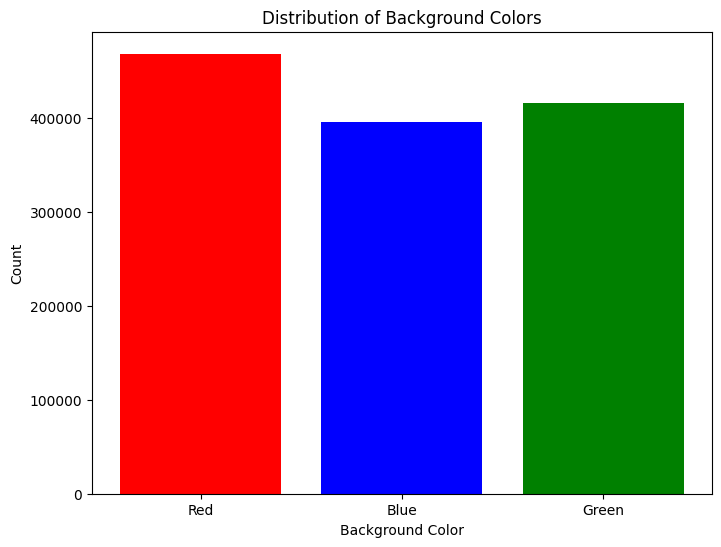

Red Background Count: 468641
Blue Background Count: 395636
Green Background Count: 416424


In [ ]:
import matplotlib.pyplot as plt

# Calculate the sum of counts for each background color
red_count = all_data['red_background'].sum()
blue_count = all_data['blue_background'].sum()
green_count = all_data['green_background'].sum()

# Plotting the distribution chart
plt.figure(figsize=(8, 6))
plt.bar(['Red', 'Blue', 'Green'], [red_count, blue_count, green_count], color=['red', 'blue', 'green'])
plt.title('Distribution of Background Colors')
plt.xlabel('Background Color')
plt.ylabel('Count')
plt.show()

# Calculate the sum of counts for each background color
red_count = all_data['red_background'].sum()
blue_count = all_data['blue_background'].sum()
green_count = all_data['green_background'].sum()

# Display the numbers
print(f"Red Background Count: {red_count}")
print(f"Blue Background Count: {blue_count}")
print(f"Green Background Count: {green_count}")


In [ ]:
summary_stats = all_data.describe()
print(summary_stats)


              likes         views       comments  red_background  \
count  5.650000e+03  5.650000e+03    5650.000000     5650.000000   
mean   3.616193e+05  1.249020e+07    9523.054867       82.945310   
std    6.633728e+05  2.380159e+07   32458.220602       27.617997   
min    0.000000e+00  0.000000e+00       0.000000        2.000000   
25%    1.567300e+04  4.898772e+05     406.000000       64.000000   
50%    6.641150e+04  1.833430e+06    1361.000000       81.000000   
75%    4.600360e+05  1.197229e+07    3996.000000       99.000000   
max    7.691190e+06  2.598367e+08  353546.000000      197.000000   

       green_background  blue_background  desc_subjectivity  desc_polarity  \
count       5650.000000      5650.000000        5650.000000    5650.000000   
mean          73.703363        70.024071           0.235891       0.099326   
std           26.274302        27.129074           0.300777       0.197821   
min            2.000000         2.000000           0.000000      -0.750000 

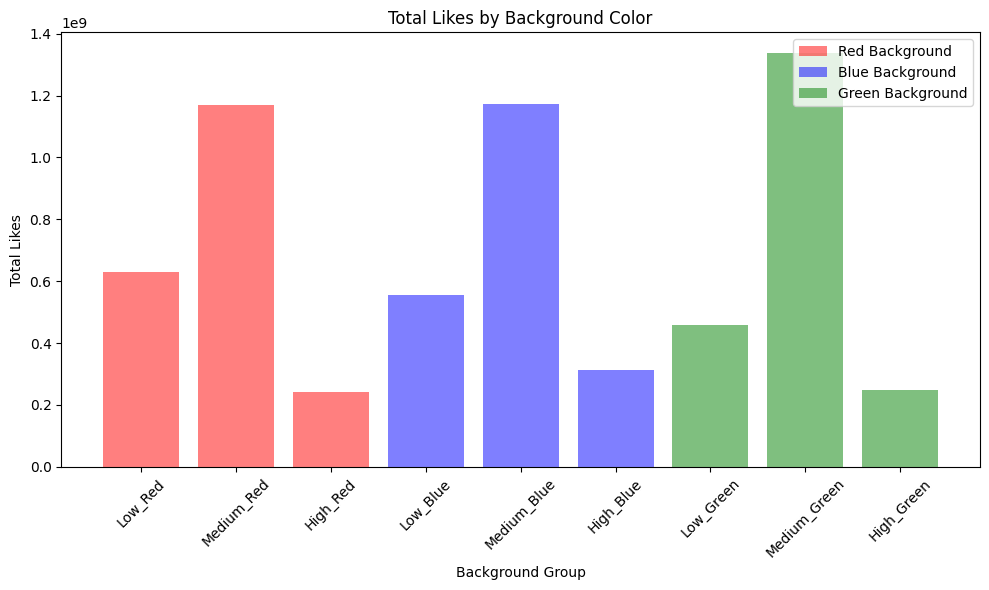

In [ ]:
# Categorize red_background values into different groups
# Define the thresholds for each group based on quartiles
low_threshold_red = summary_stats['red_background']['25%']
high_threshold_red = summary_stats['red_background']['75%']

# Create a new column to represent the red_background groups
all_data['red_background_group'] = pd.cut(all_data['red_background'], bins=[0, low_threshold_red, high_threshold_red, np.inf],
                                         labels=['Low', 'Medium', 'High'])

# Calculate the total likes for each red_background group
total_likes_by_red_group = all_data.groupby('red_background_group')['likes'].sum()

# Categorize blue_background values into different groups
# Define the thresholds for each group based on quartiles
low_threshold_blue = summary_stats['blue_background']['25%']
high_threshold_blue = summary_stats['blue_background']['75%']

# Create a new column to represent the blue_background groups
all_data['blue_background_group'] = pd.cut(all_data['blue_background'], bins=[0, low_threshold_blue, high_threshold_blue, np.inf],
                                          labels=['Low', 'Medium', 'High'])

# Calculate the total likes for each blue_background group
total_likes_by_blue_group = all_data.groupby('blue_background_group')['likes'].sum()

# Categorize green_background values into different groups
# Define the thresholds for each group based on quartiles
low_threshold_green = summary_stats['green_background']['25%']
high_threshold_green = summary_stats['green_background']['75%']

# Create a new column to represent the green_background groups
all_data['green_background_group'] = pd.cut(all_data['green_background'], bins=[0, low_threshold_green, high_threshold_green, np.inf],
                                           labels=['Low', 'Medium', 'High'])

# Calculate the total likes for each green_background group
total_likes_by_green_group = all_data.groupby('green_background_group')['likes'].sum()

# Plotting the clustered bar chart
plt.figure(figsize=(10, 6))

# Plotting red_background cluster
plt.bar(total_likes_by_red_group.index.astype(str) + '_Red', total_likes_by_red_group, color='red', alpha=0.5, label='Red Background')
# Plotting blue_background cluster
plt.bar(total_likes_by_blue_group.index.astype(str) + '_Blue', total_likes_by_blue_group, color='blue', alpha=0.5, label='Blue Background')
# Plotting green_background cluster
plt.bar(total_likes_by_green_group.index.astype(str) + '_Green', total_likes_by_green_group, color='green', alpha=0.5, label='Green Background')

plt.title('Total Likes by Background Color')
plt.xlabel('Background Group')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


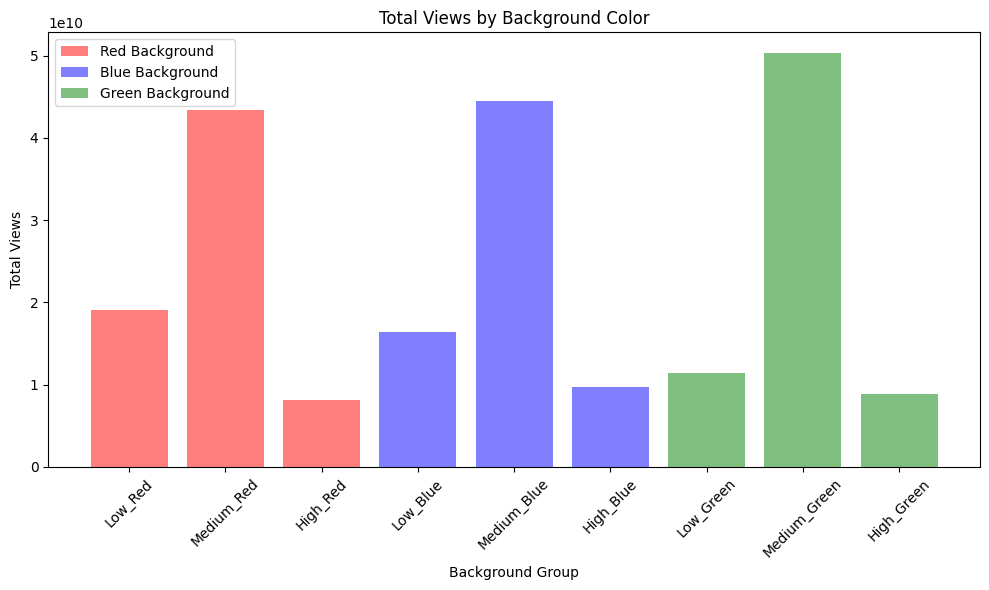

In [ ]:
# Categorize red_background values into different groups
# Define the thresholds for each group based on quartiles
low_threshold_red = summary_stats['red_background']['25%']
high_threshold_red = summary_stats['red_background']['75%']

# Create a new column to represent the red_background groups
all_data['red_background_group'] = pd.cut(all_data['red_background'], bins=[0, low_threshold_red, high_threshold_red, np.inf],
                                         labels=['Low', 'Medium', 'High'])

# Calculate the total views for each red_background group
total_views_by_red_group = all_data.groupby('red_background_group')['views'].sum()

# Categorize blue_background values into different groups
# Define the thresholds for each group based on quartiles
low_threshold_blue = summary_stats['blue_background']['25%']
high_threshold_blue = summary_stats['blue_background']['75%']

# Create a new column to represent the blue_background groups
all_data['blue_background_group'] = pd.cut(all_data['blue_background'], bins=[0, low_threshold_blue, high_threshold_blue, np.inf],
                                          labels=['Low', 'Medium', 'High'])

# Calculate the total views for each blue_background group
total_views_by_blue_group = all_data.groupby('blue_background_group')['views'].sum()

# Categorize green_background values into different groups
# Define the thresholds for each group based on quartiles
low_threshold_green = summary_stats['green_background']['25%']
high_threshold_green = summary_stats['green_background']['75%']

# Create a new column to represent the green_background groups
all_data['green_background_group'] = pd.cut(all_data['green_background'], bins=[0, low_threshold_green, high_threshold_green, np.inf],
                                           labels=['Low', 'Medium', 'High'])

# Calculate the total views for each green_background group
total_views_by_green_group = all_data.groupby('green_background_group')['views'].sum()

# Plotting the clustered bar chart
plt.figure(figsize=(10, 6))

# Plotting red_background cluster
plt.bar(total_views_by_red_group.index.astype(str) + '_Red', total_views_by_red_group, color='red', alpha=0.5, label='Red Background')
# Plotting blue_background cluster
plt.bar(total_views_by_blue_group.index.astype(str) + '_Blue', total_views_by_blue_group, color='blue', alpha=0.5, label='Blue Background')
# Plotting green_background cluster
plt.bar(total_views_by_green_group.index.astype(str) + '_Green', total_views_by_green_group, color='green', alpha=0.5, label='Green Background')

plt.title('Total Views by Background Color')
plt.xlabel('Background Group')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


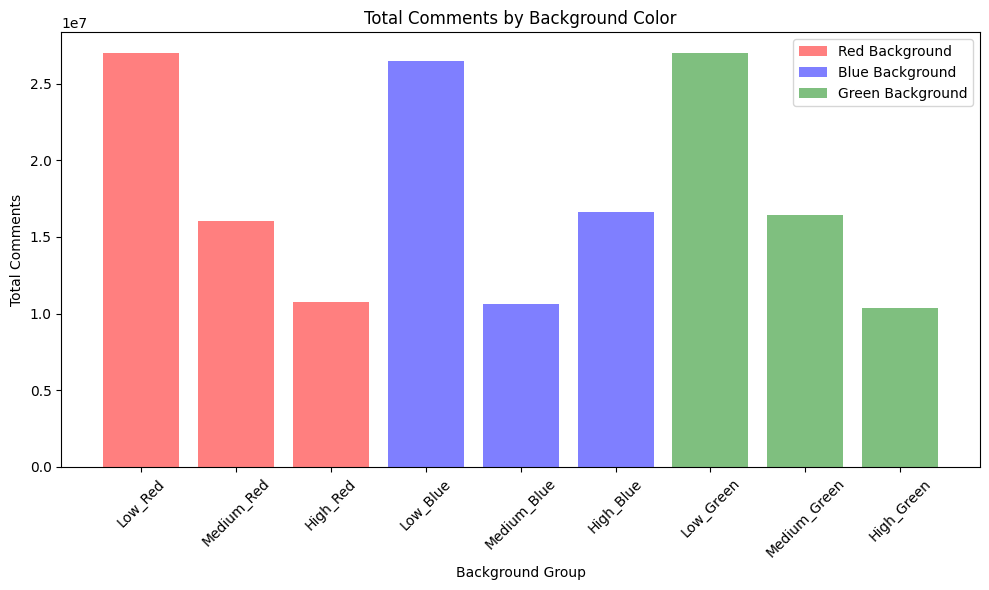

In [ ]:
# Categorize red_background values into different groups
# Define the thresholds for each group based on quartiles
low_threshold_red = summary_stats['red_background']['25%']
high_threshold_red = summary_stats['red_background']['75%']

# Create a new column to represent the red_background groups
all_data['red_background_group'] = pd.cut(all_data['red_background'], bins=[0, low_threshold_red, high_threshold_red, np.inf],
                                         labels=['Low', 'Medium', 'High'])

# Calculate the total comments for each red_background group
total_comments_by_red_group = all_data.groupby('red_background_group')['comments'].sum()

# Categorize blue_background values into different groups
# Define the thresholds for each group based on quartiles
low_threshold_blue = summary_stats['blue_background']['25%']
high_threshold_blue = summary_stats['blue_background']['75%']

# Create a new column to represent the blue_background groups
all_data['blue_background_group'] = pd.cut(all_data['blue_background'], bins=[0, low_threshold_blue, high_threshold_blue, np.inf],
                                          labels=['Low', 'Medium', 'High'])

# Calculate the total comments for each blue_background group
total_comments_by_blue_group = all_data.groupby('blue_background_group')['comments'].sum()

# Categorize green_background values into different groups
# Define the thresholds for each group based on quartiles
low_threshold_green = summary_stats['green_background']['25%']
high_threshold_green = summary_stats['green_background']['75%']

# Create a new column to represent the green_background groups
all_data['green_background_group'] = pd.cut(all_data['green_background'], bins=[0, low_threshold_green, high_threshold_green, np.inf],
                                           labels=['Low', 'Medium', 'High'])

# Calculate the total comments for each green_background group
total_comments_by_green_group = all_data.groupby('green_background_group')['comments'].sum()

# Plotting the clustered bar chart
plt.figure(figsize=(10, 6))

# Plotting red_background cluster
plt.bar(total_comments_by_red_group.index.astype(str) + '_Red', total_comments_by_red_group, color='red', alpha=0.5, label='Red Background')
# Plotting blue_background cluster
plt.bar(total_comments_by_blue_group.index.astype(str) + '_Blue', total_comments_by_blue_group, color='blue', alpha=0.5, label='Blue Background')
# Plotting green_background cluster
plt.bar(total_comments_by_green_group.index.astype(str) + '_Green', total_comments_by_green_group, color='green', alpha=0.5, label='Green Background')

plt.title('Total Comments by Background Color')
plt.xlabel('Background Group')
plt.ylabel('Total Comments')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


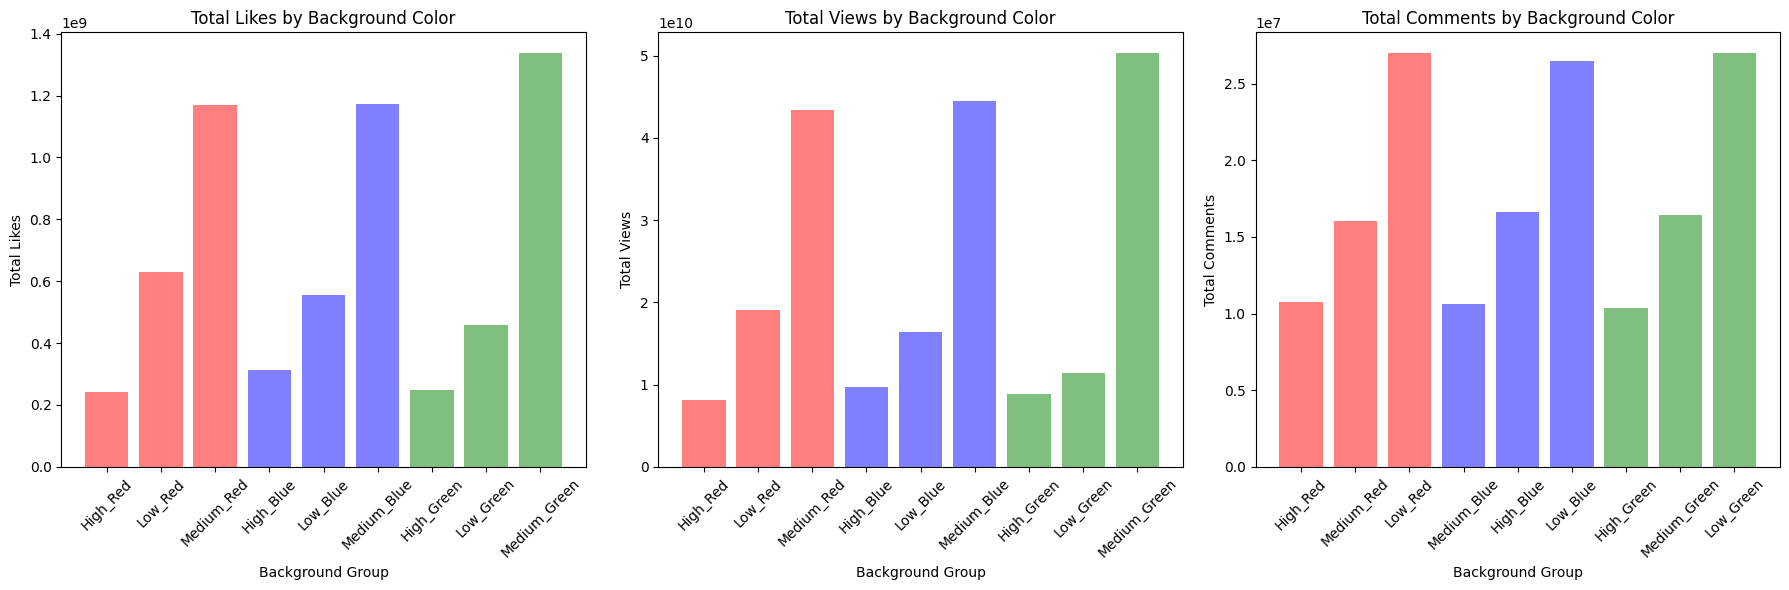

In [ ]:
# Sort the data by total likes/views/comments
total_likes_by_red_group = total_likes_by_red_group.sort_values()
total_likes_by_blue_group = total_likes_by_blue_group.sort_values()
total_likes_by_green_group = total_likes_by_green_group.sort_values()

total_views_by_red_group = total_views_by_red_group.sort_values()
total_views_by_blue_group = total_views_by_blue_group.sort_values()
total_views_by_green_group = total_views_by_green_group.sort_values()

total_comments_by_red_group = total_comments_by_red_group.sort_values()
total_comments_by_blue_group = total_comments_by_blue_group.sort_values()
total_comments_by_green_group = total_comments_by_green_group.sort_values()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)  # Create subplots with 1 row and 3 columns

# Plotting the total likes by background color
axes[0].bar(total_likes_by_red_group.index.astype(str) + '_Red', total_likes_by_red_group, color='red', alpha=0.5, label='Red Background')
axes[0].bar(total_likes_by_blue_group.index.astype(str) + '_Blue', total_likes_by_blue_group, color='blue', alpha=0.5, label='Blue Background')
axes[0].bar(total_likes_by_green_group.index.astype(str) + '_Green', total_likes_by_green_group, color='green', alpha=0.5, label='Green Background')
axes[0].set_title('Total Likes by Background Color')
axes[0].set_xlabel('Background Group')
axes[0].set_ylabel('Total Likes')
axes[0].grid(False)

# Plotting the total views by background color
axes[1].bar(total_views_by_red_group.index.astype(str) + '_Red', total_views_by_red_group, color='red', alpha=0.5, label='Red Background')
axes[1].bar(total_views_by_blue_group.index.astype(str) + '_Blue', total_views_by_blue_group, color='blue', alpha=0.5, label='Blue Background')
axes[1].bar(total_views_by_green_group.index.astype(str) + '_Green', total_views_by_green_group, color='green', alpha=0.5, label='Green Background')
axes[1].set_title('Total Views by Background Color')
axes[1].set_xlabel('Background Group')
axes[1].set_ylabel('Total Views')
axes[1].grid(False)

# Plotting the total comments by background color
axes[2].bar(total_comments_by_red_group.index.astype(str) + '_Red', total_comments_by_red_group, color='red', alpha=0.5, label='Red Background')
axes[2].bar(total_comments_by_blue_group.index.astype(str) + '_Blue', total_comments_by_blue_group, color='blue', alpha=0.5, label='Blue Background')
axes[2].bar(total_comments_by_green_group.index.astype(str) + '_Green', total_comments_by_green_group, color='green', alpha=0.5, label='Green Background')
axes[2].set_title('Total Comments by Background Color')
axes[2].set_xlabel('Background Group')
axes[2].set_ylabel('Total Comments')
axes[2].grid(False)

# Rotate x-axis labels
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




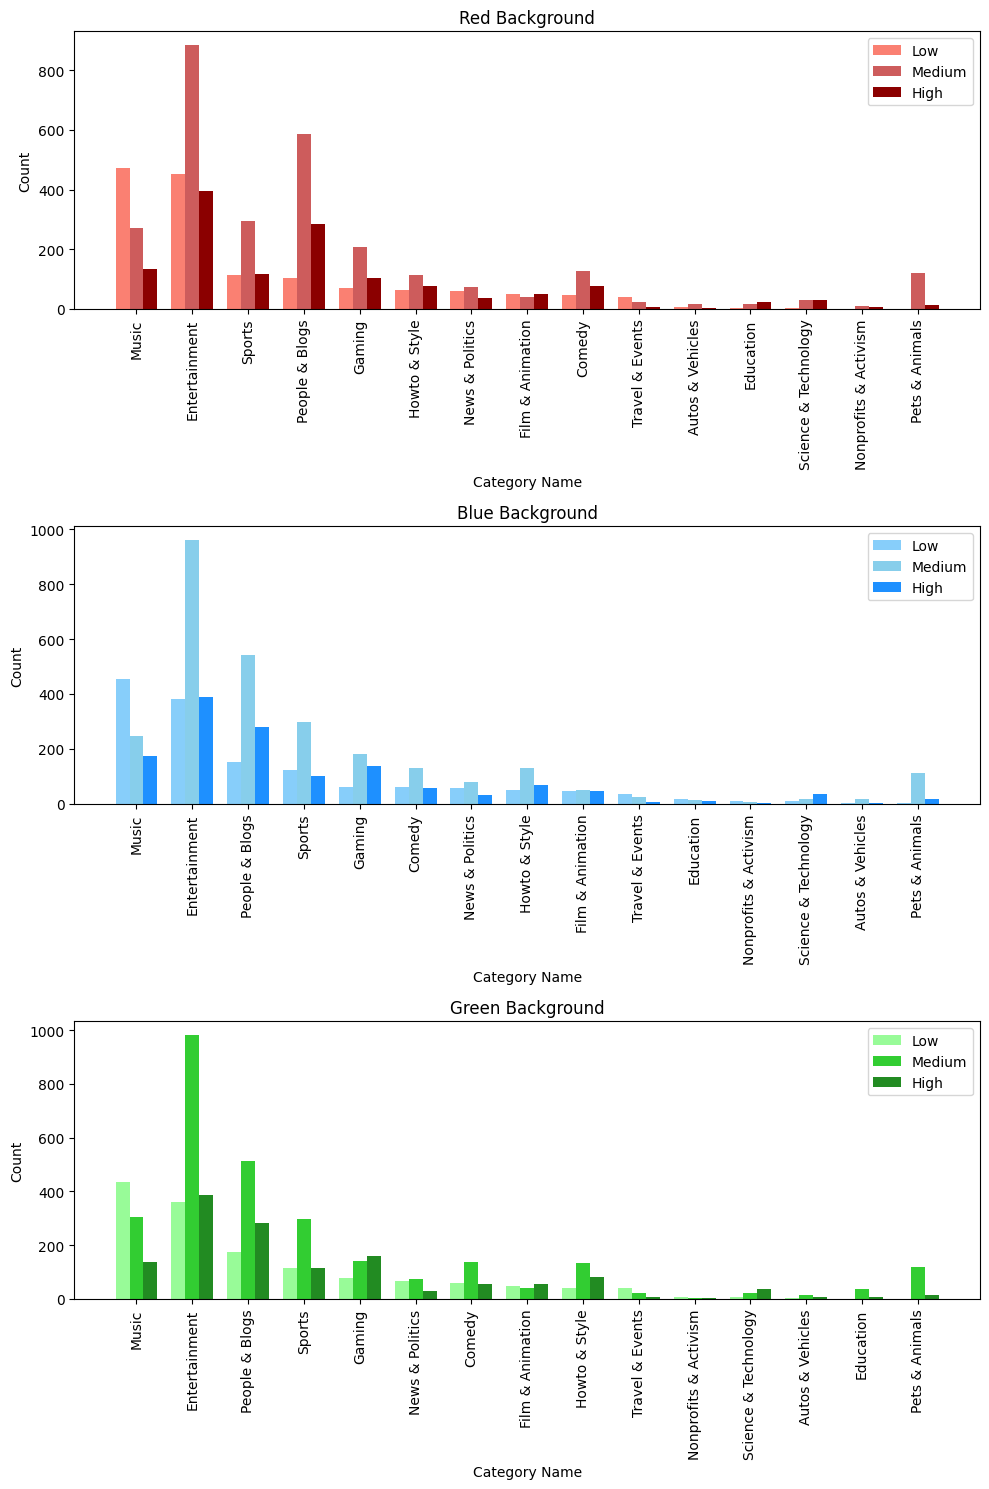

In [ ]:
color_map = {'Low': {'Red': 'salmon', 'Green': 'palegreen', 'Blue': 'lightskyblue'},
             'Medium': {'Red': 'indianred', 'Green': 'limegreen', 'Blue': 'skyblue'},
             'High': {'Red': 'darkred', 'Green': 'forestgreen', 'Blue': 'dodgerblue'}}

# Compute counts for each background color group and intensity level
red_counts = all_data.groupby(['category_name', 'red_background_group']).size().unstack(fill_value=0)
blue_counts = all_data.groupby(['category_name', 'blue_background_group']).size().unstack(fill_value=0)
green_counts = all_data.groupby(['category_name', 'green_background_group']).size().unstack(fill_value=0)

# Plotting the chart
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Define the width of each bar group
bar_width = 0.25

# Define the x-positions for each bar group
x = np.arange(len(red_counts.index))

# Sort the data in each color group by count (in increasing order)
red_counts_sorted = red_counts.loc[:, ['Low', 'Medium', 'High']].sort_values(by='Low', ascending=False)
blue_counts_sorted = blue_counts.loc[:, ['Low', 'Medium', 'High']].sort_values(by='Low', ascending=False)
green_counts_sorted = green_counts.loc[:, ['Low', 'Medium', 'High']].sort_values(by='Low', ascending=False)

# Plotting for red background
for i, intensity in enumerate(red_counts_sorted.columns):
    ax[0].bar(x + i * bar_width, red_counts_sorted[intensity], color=color_map[intensity]['Red'], width=bar_width, label=intensity)

ax[0].set_title('Red Background')
ax[0].set_xlabel('Category Name')
ax[0].set_ylabel('Count')
ax[0].set_xticks(x + bar_width)
ax[0].set_xticklabels(red_counts_sorted.index, rotation=90)  # Rotate the labels by 90 degrees
ax[0].legend()

# Plotting for blue background
for i, intensity in enumerate(blue_counts_sorted.columns):
    ax[1].bar(x + i * bar_width, blue_counts_sorted[intensity], color=color_map[intensity]['Blue'], width=bar_width, label=intensity)

ax[1].set_title('Blue Background')
ax[1].set_xlabel('Category Name')
ax[1].set_ylabel('Count')
ax[1].set_xticks(x + bar_width)
ax[1].set_xticklabels(blue_counts_sorted.index, rotation=90)  # Rotate the labels by 90 degrees
ax[1].legend()

# Plotting for green background
for i, intensity in enumerate(green_counts_sorted.columns):
    ax[2].bar(x + i * bar_width, green_counts_sorted[intensity], color=color_map[intensity]['Green'], width=bar_width, label=intensity)

ax[2].set_title('Green Background')
ax[2].set_xlabel('Category Name')
ax[2].set_ylabel('Count')
ax[2].set_xticks(x + bar_width)
ax[2].set_xticklabels(green_counts_sorted.index, rotation=90)  # Rotate the labels by 90 degrees
ax[2].legend()

plt.tight_layout()
plt.show()




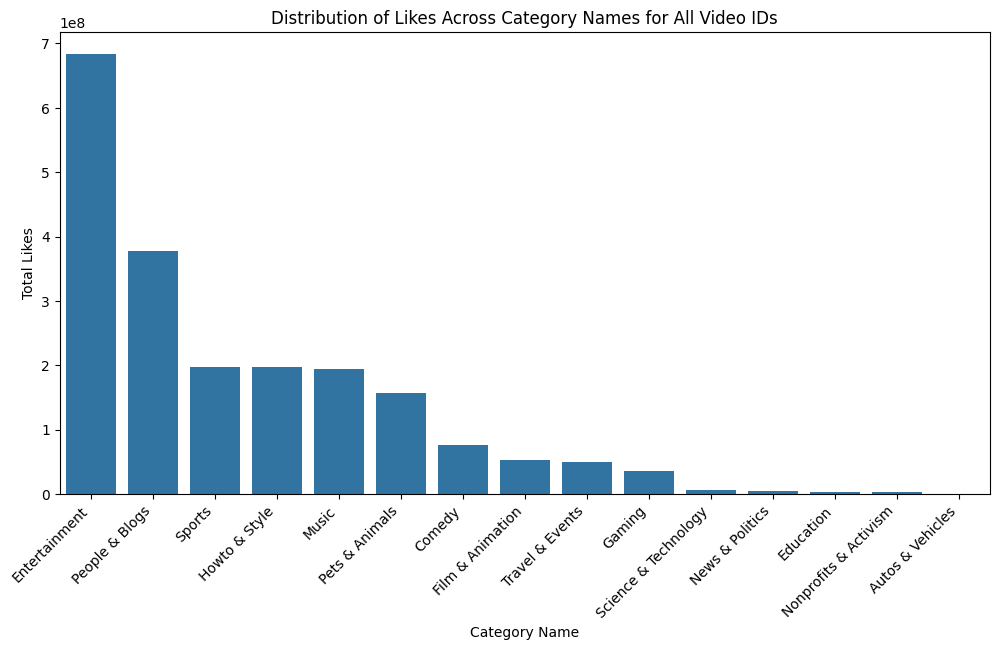

Total Likes Across Category Names for All Video IDs:
category_name
Entertainment            683474336
People & Blogs           377625106
Sports                   197738765
Howto & Style            197105100
Music                    193645913
Pets & Animals           157486401
Comedy                    76091996
Film & Animation          53788203
Travel & Events           49815376
Gaming                    36518133
Science & Technology       7053731
News & Politics            5417769
Education                  3845838
Nonprofits & Activism      2564947
Autos & Vehicles            977378
Name: likes, dtype: int64


In [ ]:
import seaborn as sns

# Convert 'likes' column to numeric data type
all_data['likes'] = pd.to_numeric(all_data['likes'], errors='coerce')

# Group the data by category name and calculate the sum of likes for each group
likes_by_category = all_data.groupby('category_name')['likes'].sum().sort_values(ascending=False)

# Plot the distribution of likes across category names
plt.figure(figsize=(12, 6))
sns.barplot(x=likes_by_category.index, y=likes_by_category.values, order=likes_by_category.index)
plt.title('Distribution of Likes Across Category Names for All Video IDs')
plt.xlabel('Category Name')
plt.ylabel('Total Likes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the total likes for each category
print("Total Likes Across Category Names for All Video IDs:")
print(likes_by_category)


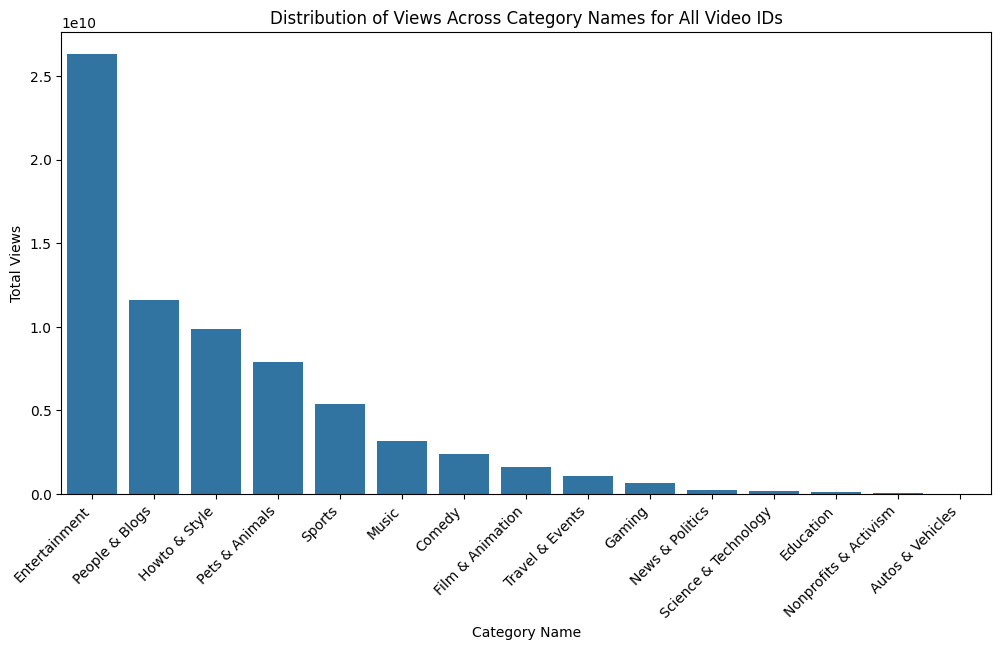

Total Views Across Category Names for All Video IDs:
category_name
Entertainment            26301990818
People & Blogs           11581944593
Howto & Style             9866938708
Pets & Animals            7878253867
Sports                    5394331333
Music                     3148925110
Comedy                    2371552696
Film & Animation          1648580246
Travel & Events           1097106730
Gaming                     650524556
News & Politics            234788930
Science & Technology       217143890
Education                  107494476
Nonprofits & Activism       45888739
Autos & Vehicles            24138743
Name: views, dtype: int64


In [ ]:
# Group the data by category name and calculate the sum of views for each group
views_by_category = all_data.groupby('category_name')['views'].sum().sort_values(ascending=False)

# Plot the distribution of views across category names
plt.figure(figsize=(12, 6))
sns.barplot(x=views_by_category.index, y=views_by_category.values, order=views_by_category.index)
plt.title('Distribution of Views Across Category Names for All Video IDs')
plt.xlabel('Category Name')
plt.ylabel('Total Views')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the total views for each category
print("Total Views Across Category Names for All Video IDs:")
print(views_by_category)

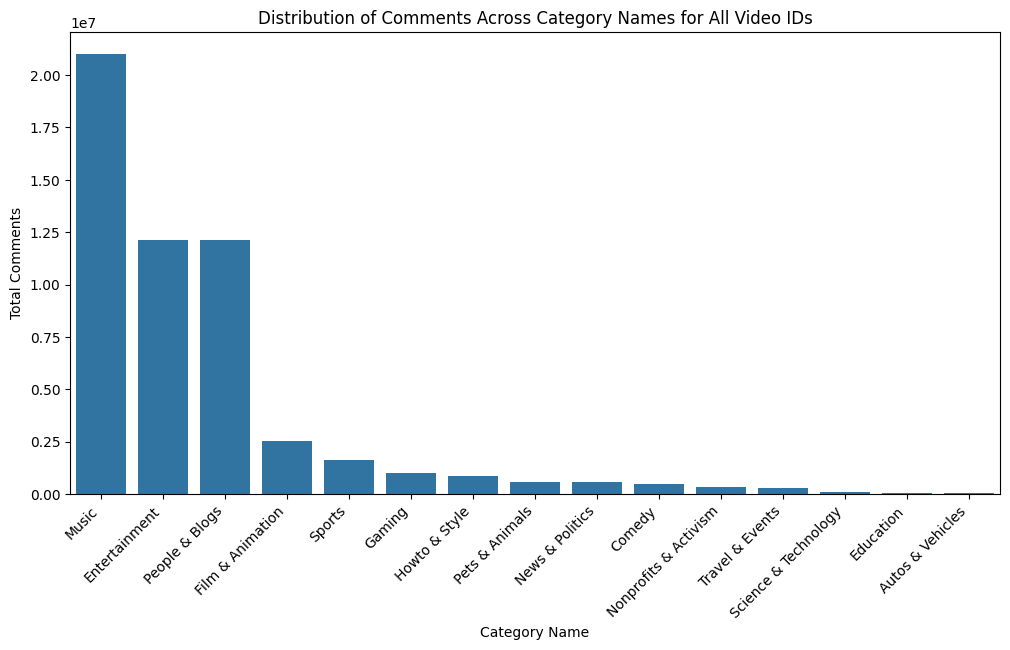

Total Comments Across Category Names for All Video IDs:
category_name
Music                    21000610
Entertainment            12131327
People & Blogs           12112499
Film & Animation          2545224
Sports                    1607989
Gaming                    1011288
Howto & Style              879214
Pets & Animals             580519
News & Politics            556089
Comedy                     461704
Nonprofits & Activism      357237
Travel & Events            315415
Science & Technology        98749
Education                   77576
Autos & Vehicles            69820
Name: comments, dtype: int64


In [ ]:
# Group the data by category name and calculate the sum of comments for each group
comments_by_category = all_data.groupby('category_name')['comments'].sum().sort_values(ascending=False)

# Plot the distribution of comments across category names
plt.figure(figsize=(12, 6))
sns.barplot(x=comments_by_category.index, y=comments_by_category.values, order=comments_by_category.index)
plt.title('Distribution of Comments Across Category Names for All Video IDs')
plt.xlabel('Category Name')
plt.ylabel('Total Comments')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the total comments for each category
print("Total Comments Across Category Names for All Video IDs:")
print(comments_by_category)

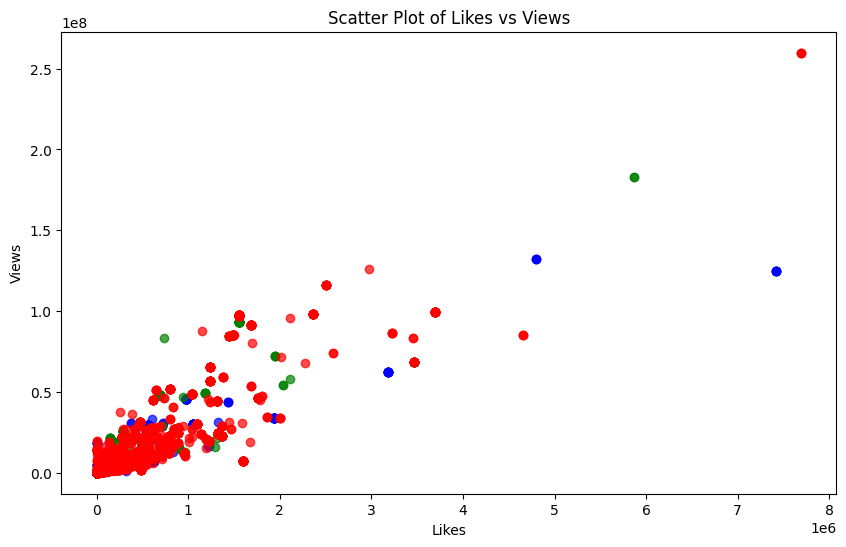

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the most intense background color for each row
all_data['most_intense_background'] = all_data[['red_background', 'green_background', 'blue_background']].idxmax(axis=1)

# Define color map for each background color
color_map = {
    'red_background': 'red',
    'green_background': 'green',
    'blue_background': 'blue'
}

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
for bg_color, group in all_data.groupby('most_intense_background'):
    plt.scatter(group['likes'], group['views'], c=color_map[bg_color], label=bg_color, alpha=0.7)

plt.title('Scatter Plot of Likes vs Views')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.grid(False)
plt.show()

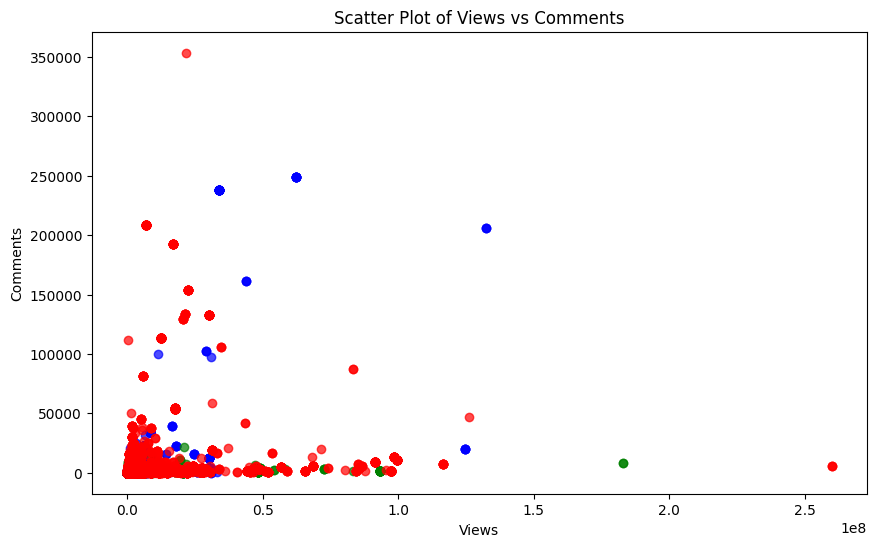

In [ ]:
# Calculate the most intense background color for each row
all_data['most_intense_background'] = all_data[['red_background', 'green_background', 'blue_background']].idxmax(axis=1)

# Define color map for each background color
color_map = {
    'red_background': 'red',
    'green_background': 'green',
    'blue_background': 'blue'
}

# Plotting the scatter plot with "views" on x-axis and "comments" on y-axis
plt.figure(figsize=(10, 6))
for bg_color, group in all_data.groupby('most_intense_background'):
    plt.scatter(group['views'], group['comments'], c=color_map[bg_color], label=bg_color, alpha=0.7)

plt.title('Scatter Plot of Views vs Comments')
plt.xlabel('Views')
plt.ylabel('Comments')
plt.grid(False)
plt.show()

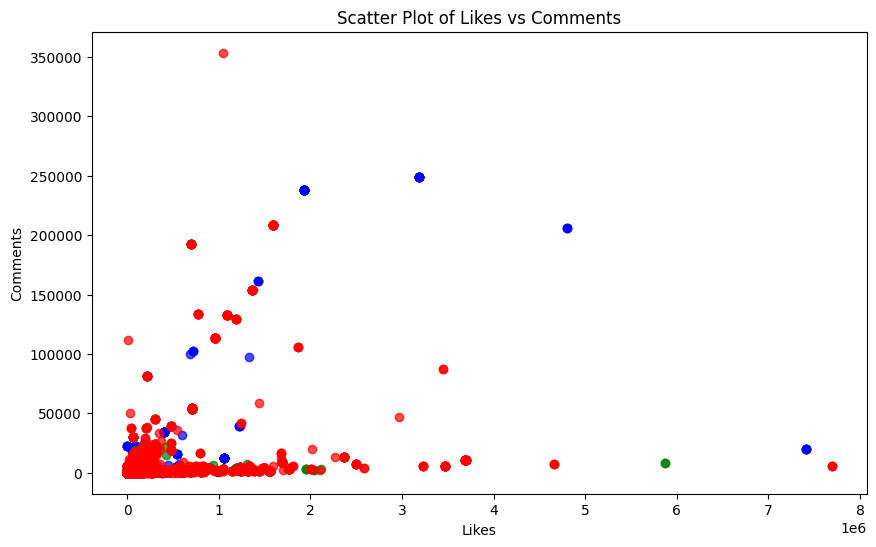

In [ ]:
# Calculate the most intense background color for each row
all_data['most_intense_background'] = all_data[['red_background', 'green_background', 'blue_background']].idxmax(axis=1)

# Define color map for each background color
color_map = {
    'red_background': 'red',
    'green_background': 'green',
    'blue_background': 'blue'
}

# Plotting the scatter plot with "likes" on x-axis and "comments" on y-axis
plt.figure(figsize=(10, 6))
for bg_color, group in all_data.groupby('most_intense_background'):
    plt.scatter(group['likes'], group['comments'], c=color_map[bg_color], label=bg_color, alpha=0.7)

plt.title('Scatter Plot of Likes vs Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.grid(False)
plt.show()

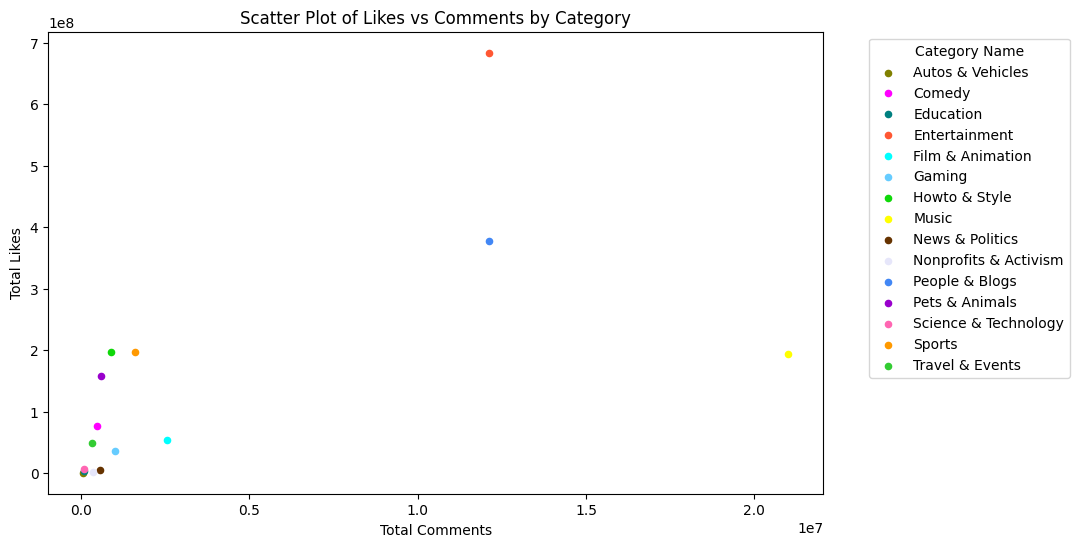

Category Name: Howto & Style, Title: Mac & Cheese Donut @patrickzeinali @ChefRush, Likes: 7691190, Comments: 5663, Red Background: 85, Blue Background: 51, Green Background: 64
Category Name: Entertainment, Title: The World's Fastest Cleaners, Likes: 7415614, Comments: 19694, Red Background: 71, Blue Background: 81, Green Background: 76
Category Name: Sports, Title: FOOTBALL WITH PLAY BUTTONS ▶️ #roadto100million, Likes: 5868159, Comments: 8318, Red Background: 67, Blue Background: 36, Green Background: 73
Category Name: People & Blogs, Title: Buy Feastables, Win Unlimited Money, Likes: 3467696, Comments: 5977, Red Background: 72, Blue Background: 65, Green Background: 71
Category Name: Film & Animation, Title: THE AMAZING DIGITAL CIRCUS - Ep 2: Candy Carrier Chaos!, Likes: 3186977, Comments: 249263, Red Background: 117, Blue Background: 118, Green Background: 98
Category Name: Travel & Events, Title: This Is A Good Lesson.!🙏#shorts #humanity #motivation #inspiration #awareness #vegeta

In [ ]:
# Create a dictionary to map each category to a unique color
category_color_map = {
    'Entertainment': '#FF5733',  # Reddish
    'People & Blogs': '#4287f5',  # Blue
    'Howto & Style': '#0fd809',  # Green
    'Sports': '#ff9900',          # Orange
    'Pets & Animals': '#9900cc',  # Purple
    'Unknown': '#666666',         # Gray
    'Film & Animation': '#00FFFF',# Cyan
    'Comedy': '#FF00FF',          # Magenta
    'Music': '#FFFF00',           # Yellow
    'Gaming': '#66ccff',          # Light Blue
    'Travel & Events': '#33cc33', # Light Green
    'Science & Technology': '#FF66B2',  # Pink
    'News & Politics': '#663300',  # Brown
    'Education': '#008080',       # Teal
    'Nonprofits & Activism': '#E6E6FA',  # Lavender
    'Autos & Vehicles': '#808000' # Olive
}

# Create scatter plot
plt.figure(figsize=(10, 6))

# Iterate over each unique category in the DataFrame
grouped_data = all_data.groupby('category_name')
for category_name, group in grouped_data:
    # Get the total likes and comments for the current category
    total_likes = group['likes'].sum()
    total_comments = group['comments'].sum()

    # Get the color for the current category
    category_color = category_color_map.get(category_name, 'black')

    # Set dot size based on dominant color
    dot_size = 20

    # Plot the point with the corresponding color and size
    plt.scatter(total_comments, total_likes, color=category_color, s=dot_size, label=category_name)

# Set plot title and labels
plt.title('Scatter Plot of Likes vs Comments by Category')
plt.xlabel('Total Comments')
plt.ylabel('Total Likes')

# Move legend outside of the chart
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(False)
plt.show()

# Sort the DataFrame based on the sum of likes and comments in descending order
sorted_data3 = all_data.sort_values(by=['likes', 'comments'], ascending=False)

# Get the top 10 rows with the highest likes and comments combination
top_10_results = sorted_data3.drop_duplicates(subset='category_name').head(10)

# Iterate over each row in the top 10 results
for _, row in top_10_results.iterrows():
    # Get the likes, comments, video ID for the current row
    likes = row['likes']
    comments = row['comments']
    category_name = row['category_name']
    title = row['title']
    red_background = row['red_background']
    blue_background = row['blue_background']
    green_background = row['green_background']

    # Print the information for the current row
    print(f'Category Name: {category_name}, Title: {title}, Likes: {likes}, Comments: {comments}, Red Background: {red_background}, Blue Background: {blue_background}, Green Background: {green_background}')



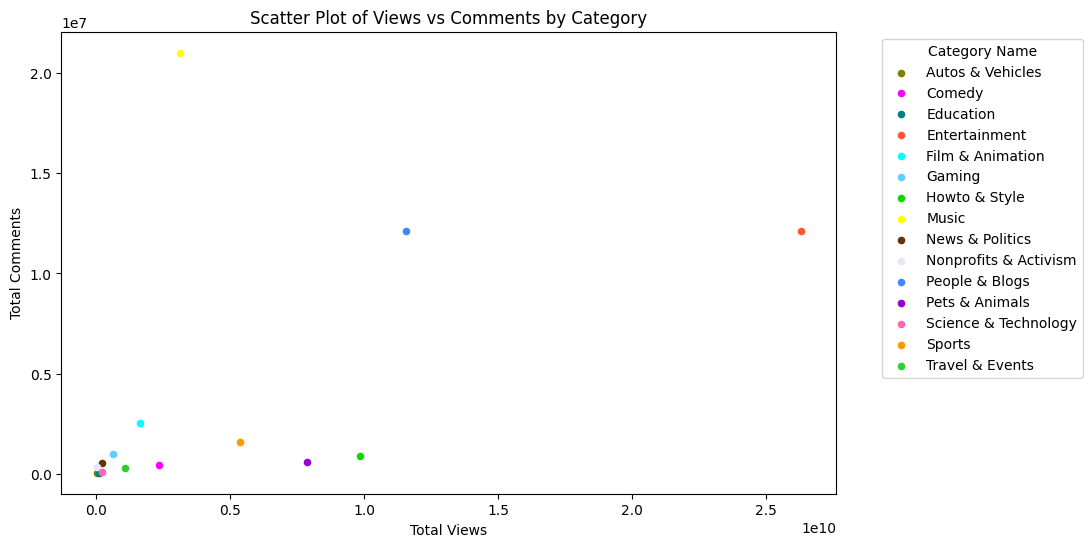

Category Name: Howto & Style, Title: Mac & Cheese Donut @patrickzeinali @ChefRush, Views: 259836651, Comments: 5663, Red Background: 85, Blue Background: 51, Green Background: 64
Category Name: Sports, Title: FOOTBALL WITH PLAY BUTTONS ▶️ #roadto100million, Views: 182990420, Comments: 8318, Red Background: 67, Blue Background: 36, Green Background: 73
Category Name: Entertainment, Title: Ages 1 - 100 Decide Who Wins $250,000, Views: 132394511, Comments: 206275, Red Background: 104, Blue Background: 106, Green Background: 99
Category Name: Travel & Events, Title: This Is A Good Lesson.!🙏#shorts #humanity #motivation #inspiration #awareness #vegetableseller #car, Views: 126223356, Comments: 46931, Red Background: 43, Blue Background: 40, Green Background: 36
Category Name: Pets & Animals, Title: 【獨生子的日常】让小奶猫也体验一把鬼打墙#小奶喵 #铲屎官的乐趣, Views: 98423192, Comments: 12971, Red Background: 87, Blue Background: 87, Green Background: 82
Category Name: People & Blogs, Title: 白天使和小丑帮助黑天使。#天使 #超人不会飞 #超人夫

In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))

# Iterate over each unique category in the DataFrame
grouped_data = all_data.groupby('category_name')
for category_name, group in grouped_data:
    # Get the total views and comments for the current category
    total_views = group['views'].sum()
    total_comments = group['comments'].sum()

    # Get the color for the current category
    category_color = category_color_map.get(category_name, 'black')

    # Set dot size
    dot_size = 20

    # Plot the point with the corresponding color and size
    plt.scatter(total_views, total_comments, color=category_color, s=dot_size, label=category_name)

# Set plot title and labels
plt.title('Scatter Plot of Views vs Comments by Category')
plt.xlabel('Total Views')
plt.ylabel('Total Comments')

# Move legend outside of the chart
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(False)
plt.show()

# Sort the DataFrame based on the sum of views and comments in descending order
sorted_data4 = all_data.sort_values(by=['views', 'comments'], ascending=False)

# Get the top 10 rows with the highest views and comments combination
top_10_results = sorted_data4.drop_duplicates(subset='category_name').head(10)

# Iterate over each row in the top 10 results
for _, row in top_10_results.iterrows():
    # Get the views, comments, video ID, and dominant color for the current row
    views = row['views']
    comments = row['comments']
    category_name = row['category_name']
    title = row['title']
    red_background = row['red_background']
    blue_background = row['blue_background']
    green_background = row['green_background']

    # Print the information for the current row
    print(f'Category Name: {category_name}, Title: {title}, Views: {views}, Comments: {comments}, Red Background: {red_background}, Blue Background: {blue_background}, Green Background: {green_background}')


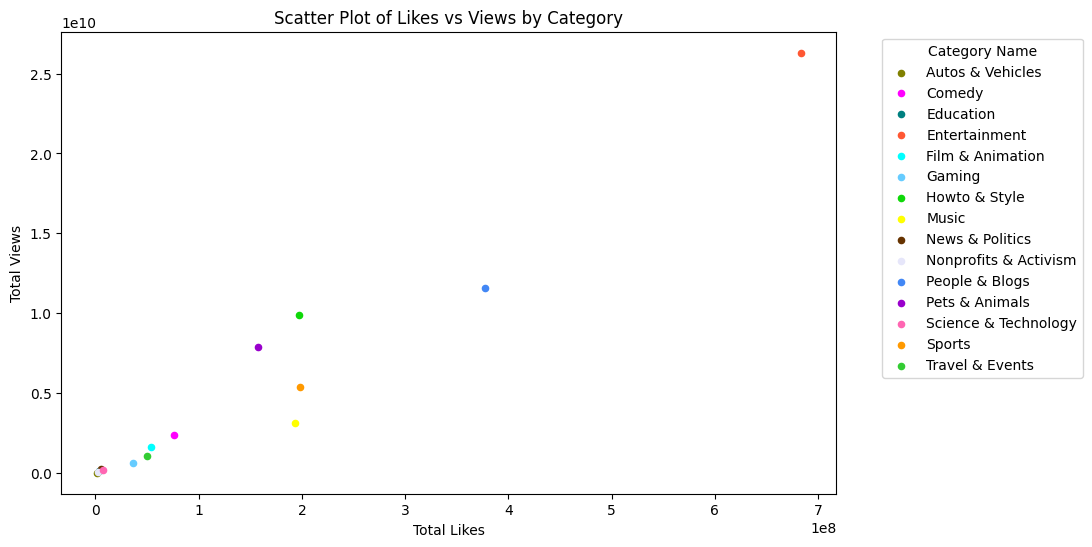

Category Name: Howto & Style, Title: Mac & Cheese Donut @patrickzeinali @ChefRush, Views: 259836651, Likes: 7691190, Red Background: 85, Blue Background: 51, Green Background: 64
Category Name: Entertainment, Title: The World's Fastest Cleaners, Views: 124721738, Likes: 7415614, Red Background: 71, Blue Background: 81, Green Background: 76
Category Name: Sports, Title: FOOTBALL WITH PLAY BUTTONS ▶️ #roadto100million, Views: 182990420, Likes: 5868159, Red Background: 67, Blue Background: 36, Green Background: 73
Category Name: People & Blogs, Title: Buy Feastables, Win Unlimited Money, Views: 68681132, Likes: 3467696, Red Background: 72, Blue Background: 65, Green Background: 71
Category Name: Film & Animation, Title: THE AMAZING DIGITAL CIRCUS - Ep 2: Candy Carrier Chaos!, Views: 62236121, Likes: 3186977, Red Background: 117, Blue Background: 118, Green Background: 98
Category Name: Travel & Events, Title: This Is A Good Lesson.!🙏#shorts #humanity #motivation #inspiration #awareness #v

In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))

# Iterate over each unique category in the DataFrame
grouped_data = all_data.groupby('category_name')
for category_name, group in grouped_data:
    # Get the total likes and views for the current category
    total_likes = group['likes'].sum()
    total_views = group['views'].sum()

    # Get the color for the current category
    category_color = category_color_map.get(category_name, 'black')

    # Set dot size
    dot_size = 20

    # Plot the point with the corresponding color and size
    plt.scatter(total_likes, total_views, color=category_color, s=dot_size, label=category_name)

# Set plot title and labels
plt.title('Scatter Plot of Likes vs Views by Category')
plt.xlabel('Total Likes')
plt.ylabel('Total Views')

# Move legend outside of the chart
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(False)
plt.show()

# Sort the DataFrame based on the sum of likes and views in descending order
sorted_data4 = all_data.sort_values(by=['likes', 'views'], ascending=False)

# Get the top 10 rows with the highest likes and views combination
top_10_results = sorted_data4.drop_duplicates(subset='category_name').head(10)

# Iterate over each row in the top 10 results
for _, row in top_10_results.iterrows():
    # Get the views, likes, video ID, and dominant color for the current row
    likes = row['likes']
    views = row['views']
    category_name = row['category_name']
    title = row['title']
    red_background = row['red_background']
    blue_background = row['blue_background']
    green_background = row['green_background']

    # Print the information for the current row
    print(f'Category Name: {category_name}, Title: {title}, Views: {views}, Likes: {likes}, Red Background: {red_background}, Blue Background: {blue_background}, Green Background: {green_background}')


In [ ]:
# Select the top 10 videos based on likes_to_comments_ratio
top_10_likes_to_comments_ratio = all_data.nlargest(10, 'likes_to_comments_ratio')[['video_id', 'title','description', 'comments_to_likes_ratio','red_background','blue_background', 'green_background']]


# Select the top 10 videos based on comments_to_likes_ratio
top_10_comments_to_likes_ratio = all_data.nlargest(10, 'comments_to_likes_ratio')[['video_id', 'title','description', 'comments_to_likes_ratio','red_background','blue_background', 'green_background']]

# Select the top 10 videos based on views_to_likes_ratio
top_10_views_to_likes_ratio = all_data.nlargest(10, 'views_to_likes_ratio')[['video_id', 'title', 'description', 'views_to_likes_ratio', 'red_background', 'blue_background', 'green_background']]

# Select the top 10 videos based on likes_to_views_ratio
top_10_likes_to_views_ratio = all_data.nlargest(10, 'likes_to_views_ratio')[['video_id', 'title', 'description', 'likes_to_views_ratio', 'red_background', 'blue_background', 'green_background']]

# Print details of top 10 videos with their titles for likes_to_comments_ratio
print("Top 10 Videos with Highest likes_to_comments_ratio:")
print(top_10_likes_to_comments_ratio)

# Print details of top 10 videos with their titles for comments_to_likes_ratio
print("Top 10 Videos with Highest comments_to_likes_ratio:")
print(top_10_comments_to_likes_ratio)

# Print details of top 10 videos with their titles for views_to_likes_ratio
print("Top 10 Videos with Highest views_to_likes_ratio:")
print(top_10_views_to_likes_ratio)

# Print details of top 10 videos with their titles for likes_to_views_ratio
print("Top 10 Videos with Highest likes_to_views_ratio:")
print(top_10_likes_to_views_ratio)



Top 10 Videos with Highest likes_to_comments_ratio:
        video_id                                              title  \
79   3dgks5KMyqE  مش هتبقي لغيري... أول رد من أحمد العوضي بعد بك...   
169  -2C_JmK0oo0              🌶️ Cinco de Mayo Calavera Dip #Shorts   
186  KhthxcoJ0ik  Ով է վարչապետի հրաժարականը պահանջող Բագրատ արք...   
238  f1J38FlDKxo                                Apple Event - May 7   
313  Hky3feqNf8s  Real Madrid 2:1 Bayern Münhen | UEFA Çempionla...   
322  s6htXrl4BoA  #BizimÇocuklar'ın Fas galibiyeti sonrası galib...   
334  -2C_JmK0oo0              🌶️ Cinco de Mayo Calavera Dip #Shorts   
341  PHkJmlcq4pk  PSJ 0:1 Borussiya Dortmund | UEFA Çempionlar L...   
367  f1J38FlDKxo                                Apple Event - May 7   
586  f1J38FlDKxo                                Apple Event - May 7   

                                           description  \
79   اشترك في قناة النهار لمشاهدة أحدث وأقوى الفيدي...   
169  Find the full recipes, with quantities and st

<ipython-input-48-728eec7cd641>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)
<ipython-input-48-728eec7cd641>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)
<ipython-input-48-728eec7cd641>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)


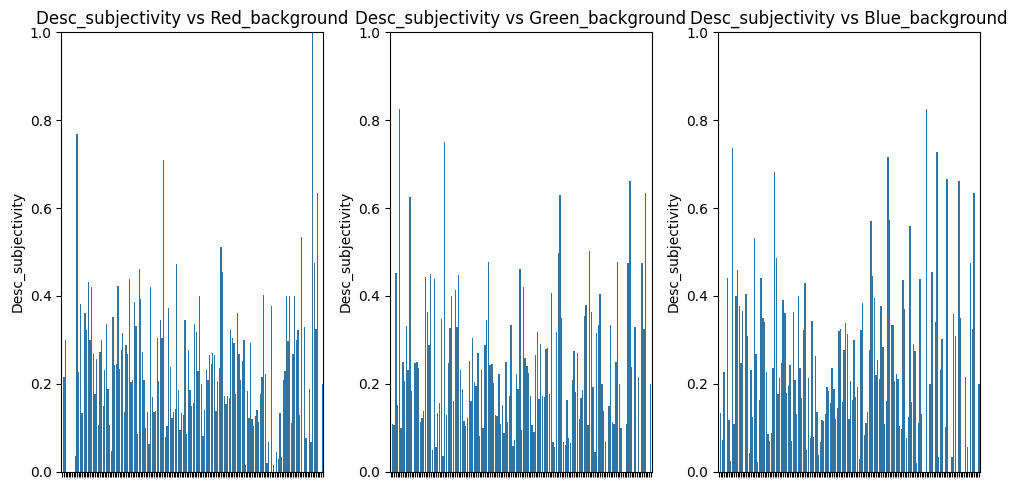

<ipython-input-48-728eec7cd641>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)
<ipython-input-48-728eec7cd641>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)
<ipython-input-48-728eec7cd641>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)


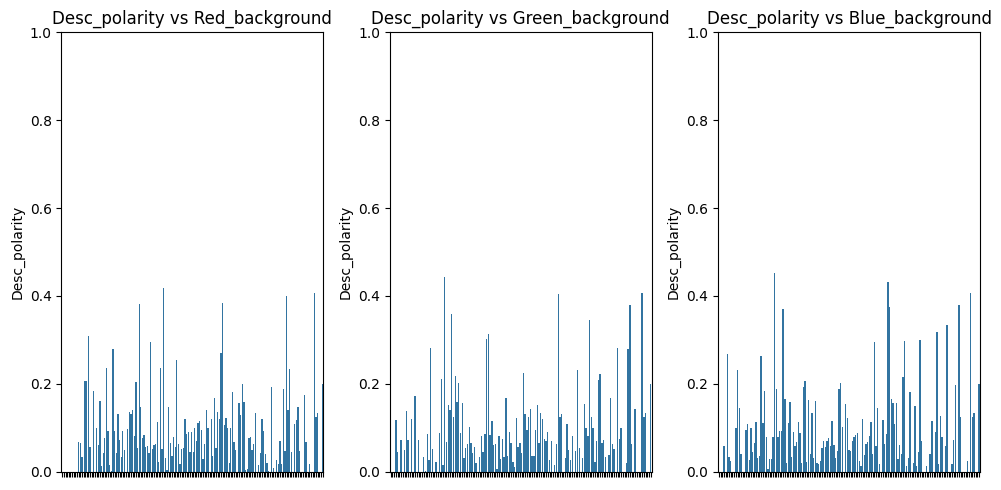

<ipython-input-48-728eec7cd641>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)
<ipython-input-48-728eec7cd641>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)
<ipython-input-48-728eec7cd641>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)


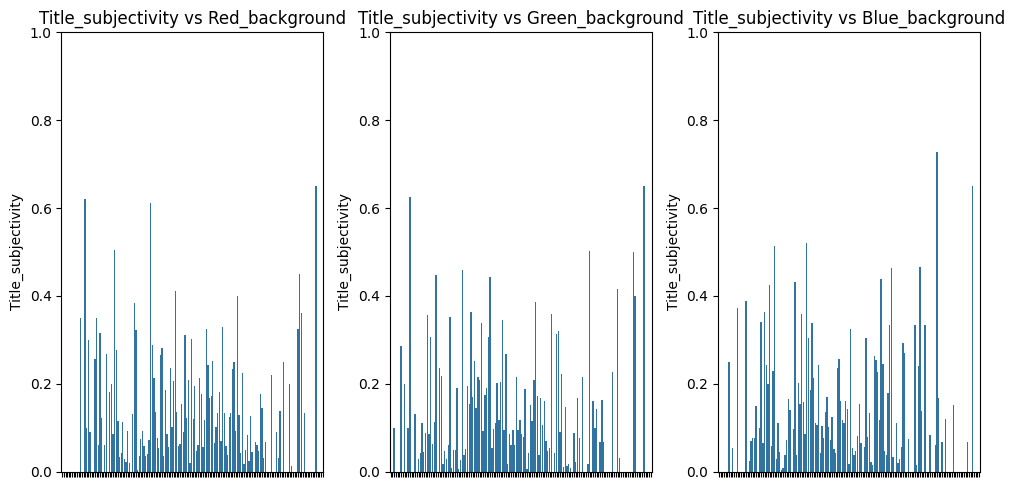

<ipython-input-48-728eec7cd641>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)
<ipython-input-48-728eec7cd641>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)
<ipython-input-48-728eec7cd641>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)


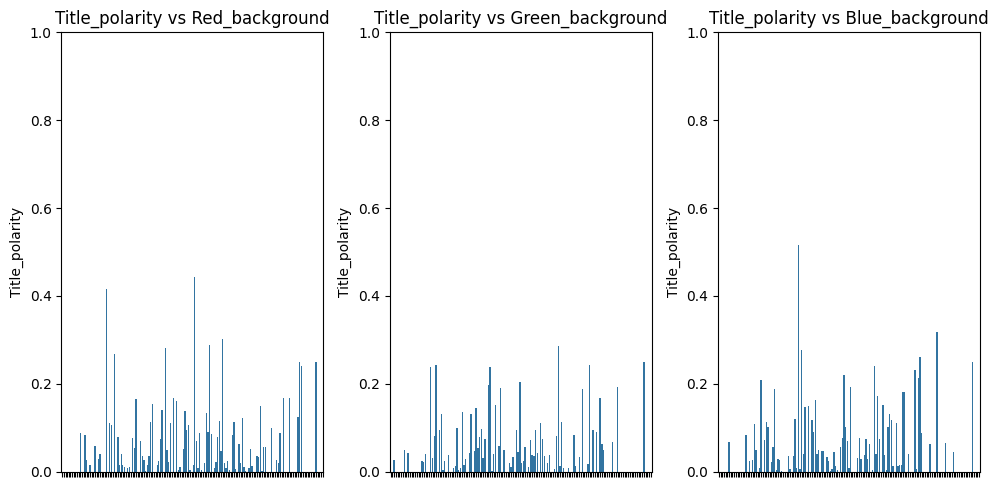

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the sentiment scores and background colors
sentiment_scores = ['desc_subjectivity', 'desc_polarity', 'title_subjectivity', 'title_polarity']
background_colors = ['red_background', 'green_background', 'blue_background']

# Plot bar charts for each sentiment score against total counts of each background color
for sentiment_score in sentiment_scores:
    plt.figure(figsize=(10, 5))
    for i, color in enumerate(background_colors, 1):
        plt.subplot(1, 3, i)
        sns.barplot(x=color, y=sentiment_score, data=all_data, ci=None)
        plt.title(f'{sentiment_score.capitalize()} vs {color.capitalize()}', fontsize=12)  # Adjust font size here
        plt.xlabel('')  # Remove x-axis label
        plt.ylabel(sentiment_score.capitalize())
        plt.xticks(rotation=45)
        plt.ylim(0, 1)  # Adjust ylim if necessary
        plt.gca().set_xticklabels([])  # Remove x-axis tick labels
    plt.tight_layout()
    plt.show()



In [ ]:
# Display all columns
pd.set_option('display.max_columns', None)

# Now, when you print all_data.head(), you should see all columns
print(all_data.head())


  country     video_id                                              title  \
0      AL  VBZPtG2svI0                           YLL LIMANI - MERRI KREJT   
1      AL  MVkKIzydJEY                        2TON - KANIHER (prod. Dard)   
2      AL  oyDUzcu9Tqo                        Glow Stick Secret 😱 #shorts   
3      AL  IkKlaRUpJhs       Alban Skenderaj - La La La  (Official Video)   
4      AL  BtSvjHkt-bU  Mariola & Jurgen Kacani - Te dua per koken ten...   

                                         description  \
0  #ylllimani #three60music #360media\n\nProduced...   
1  STREAM: https://colonize.us/c/2ton-kaniher\n\n...   
2  Mystery inside Glow Stick Bracelet! Thank you ...   
3  Produced by: Avaxus (Lorenc Aliaj)\nMusic and ...   
4  Listen now Mariola & Jurgen Kacani - Te dua pe...   

                                    thumbnail_url    likes     views  \
0  https://i.ytimg.com/vi/VBZPtG2svI0/default.jpg    10470    826149   
1  https://i.ytimg.com/vi/MVkKIzydJEY/default.jpg     86

In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
all_data.to_csv('youtube_data_added.csv', index=False)

# Download the CSV file
files.download('youtube_data_added.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
##Dummy
# Create dummy variables for 'definition' column
dummies_definition = pd.get_dummies(all_data['definition'])

# Define a function to map 'hd' to 1 and 'sd' to 0
def map_hd(x):
    return 1 if x == 'hd' else 0

# Define a function to map 'sd' to 1 and 'hd' to 0
def map_sd(x):
    return 1 if x == 'sd' else 0

# Apply the mapping functions to create binary dummy variables for 'definition'
dummies_definition['hd'] = all_data['definition'].apply(map_hd)
dummies_definition['sd'] = all_data['definition'].apply(map_sd)

# Identify unique category names
unique_categories = all_data['category_name'].unique()

# Create an empty DataFrame to store the dummy variables for 'category_name'
dummy_categories = pd.DataFrame()

# Create dummy variables for each category
for category in unique_categories:
    # Create a new column for each category, where 1 indicates the presence of the category
    dummy_categories[category] = all_data['category_name'].apply(lambda x: 1 if x == category else 0)

# Concatenate the dummy variables with the original DataFrame
df_with_dummies = pd.concat([all_data, dummies_definition, dummy_categories], axis=1)



In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
df_with_dummies.to_csv('youtube_dummy_data.csv', index=False)

# Download the CSV file
files.download('youtube_dummy_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
####Regression for likes without background colors
import statsmodels.api as sm

# Define additional independent variables
independent_vars = ['desc_polarity', 'hd', 'sd', 'title_polarity', 'views', 'comments', 'desc_subjectivity', 'title_subjectivity', 'description_length', 'duration_minutes']

# Define dependent variable (likes)
dependent_var = 'likes'

# Drop rows with missing values
df_with_dummies.dropna(subset=independent_vars + [dependent_var], inplace=True)

# Fit the regression model
X = df_with_dummies[independent_vars]
y = df_with_dummies[dependent_var]
X = sm.add_constant(X)  # Add a constant term to the independent variables
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2969.
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        21:17:01   Log-Likelihood:                -64308.
No. Observations:                4675   AIC:                         1.286e+05
Df Residuals:                    4665   BIC:                         1.287e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                2.21e+04   1.92

In [ ]:
####Regression for likes with background colors
df_with_dummies['likes'] = pd.to_numeric(df_with_dummies['likes'], errors='coerce')
# Define additional independent variables
independent_vars = ['red_background','blue_background','green_background', 'desc_polarity', 'hd', 'sd', 'title_polarity', 'views', 'comments', 'desc_subjectivity', 'title_subjectivity', 'description_length', 'duration_minutes']

# Define dependent variable (likes)
dependent_var = 'likes'

# Drop rows with missing values
df_with_dummies.dropna(subset=independent_vars + [dependent_var], inplace=True)

# Fit the regression model
X = df_with_dummies[independent_vars]
y = df_with_dummies[dependent_var]
X = sm.add_constant(X)  # Add a constant term to the independent variables
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2231.
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        21:17:05   Log-Likelihood:                -64303.
No. Observations:                4675   AIC:                         1.286e+05
Df Residuals:                    4662   BIC:                         1.287e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.586e+04   2.04

In [ ]:
####Regression for views without background colors

# Define additional independent variables
independent_vars = ['desc_polarity', 'hd', 'sd', 'title_polarity', 'likes', 'comments', 'desc_subjectivity', 'title_subjectivity', 'description_length', 'duration_minutes']

# Define dependent variable (likes)
dependent_var = 'views'

# Drop rows with missing values
df_with_dummies.dropna(subset=independent_vars + [dependent_var], inplace=True)

# Fit the regression model
X = df_with_dummies[independent_vars]
y = df_with_dummies[dependent_var]
X = sm.add_constant(X)  # Add a constant term to the independent variables
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2609.
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        21:17:16   Log-Likelihood:                -81772.
No. Observations:                4675   AIC:                         1.636e+05
Df Residuals:                    4665   BIC:                         1.636e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.402e+04   8.04

In [ ]:
####Regression for views with background colors


# Define additional independent variables
independent_vars = ['red_background','blue_background','green_background', 'desc_polarity', 'hd', 'sd', 'title_polarity', 'likes', 'comments', 'desc_subjectivity', 'title_subjectivity', 'description_length', 'duration_minutes']
# Define dependent variable (likes)
dependent_var = 'views'

# Drop rows with missing values
df_with_dummies.dropna(subset=independent_vars + [dependent_var], inplace=True)

# Fit the regression model
X = df_with_dummies[independent_vars]
y = df_with_dummies[dependent_var]
X = sm.add_constant(X)  # Add a constant term to the independent variables
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1970.
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        21:17:18   Log-Likelihood:                -81758.
No. Observations:                4675   AIC:                         1.635e+05
Df Residuals:                    4662   BIC:                         1.636e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                2.61e+05   8.52

In [ ]:
####Regression for comments without background colors

# Define additional independent variables
independent_vars = ['desc_polarity', 'hd', 'sd', 'title_polarity', 'views', 'likes', 'desc_subjectivity', 'title_subjectivity', 'description_length', 'duration_minutes']

# Define dependent variable (comments)
dependent_var = 'comments'

# Drop rows with missing values
df_with_dummies.dropna(subset=independent_vars + [dependent_var], inplace=True)

# Fit the regression model
X = df_with_dummies[independent_vars]
y = df_with_dummies[dependent_var]
X = sm.add_constant(X)  # Add a constant term to the independent variables
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               comments   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     352.6
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        21:17:23   Log-Likelihood:                -53280.
No. Observations:                4675   AIC:                         1.066e+05
Df Residuals:                    4665   BIC:                         1.066e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1368.8981   1813

In [ ]:
####Regression for comments with background colors

# Define additional independent variables
independent_vars = ['red_background','blue_background','green_background', 'desc_polarity', 'hd', 'sd', 'title_polarity', 'views', 'likes', 'desc_subjectivity', 'title_subjectivity', 'description_length', 'duration_minutes']

# Define dependent variable (comments)
dependent_var = 'comments'

# Drop rows with missing values
df_with_dummies.dropna(subset=independent_vars + [dependent_var], inplace=True)

# Fit the regression model
X = df_with_dummies[independent_vars]
y = df_with_dummies[dependent_var]
X = sm.add_constant(X)  # Add a constant term to the independent variables
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               comments   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     270.8
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        07:17:25   Log-Likelihood:                -53257.
No. Observations:                4675   AIC:                         1.065e+05
Df Residuals:                    4662   BIC:                         1.066e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2615.0220   1917